<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH_307_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_sit_github.csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())




   time  pleth_1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0     1    66165         NaN         NaN         NaN         NaN         NaN   
1     1    66160         NaN         NaN         NaN         NaN         NaN   
2     1    66149         NaN         NaN         NaN         NaN         NaN   
3     1    66153         NaN         NaN         NaN         NaN         NaN   
4     1    66153         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2         NaN         NaN         NaN          NaN          NaN          NaN   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4         NaN         NaN         NaN          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unnamed: 

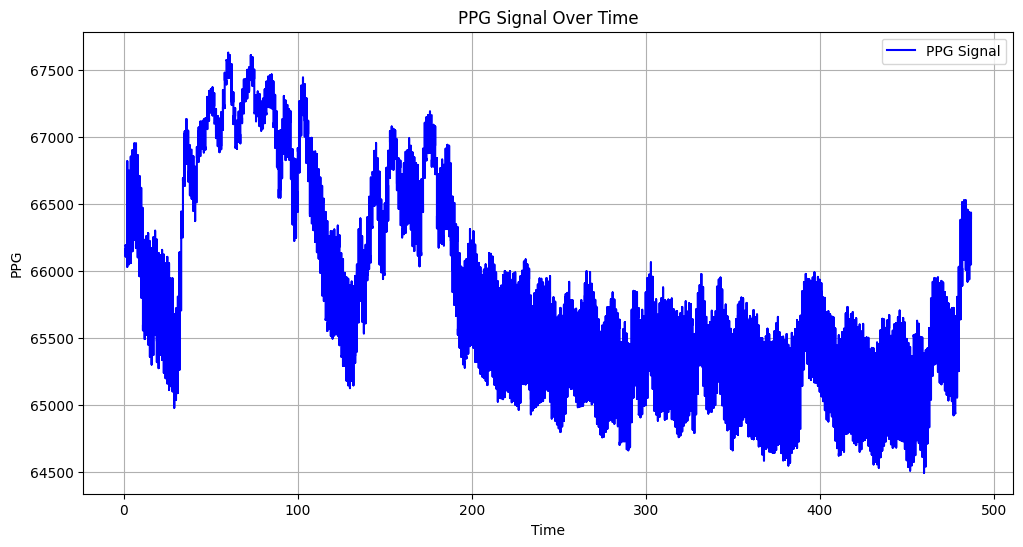

In [21]:
# Adjust these column names based on your dataset
time_column = 'time'  # Replace with the actual name of the time column
ppg_column = 'pleth_1'    # Replace with the actual name of the PPG column

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df[time_column], df[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over Time')
plt.xlabel('Time')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


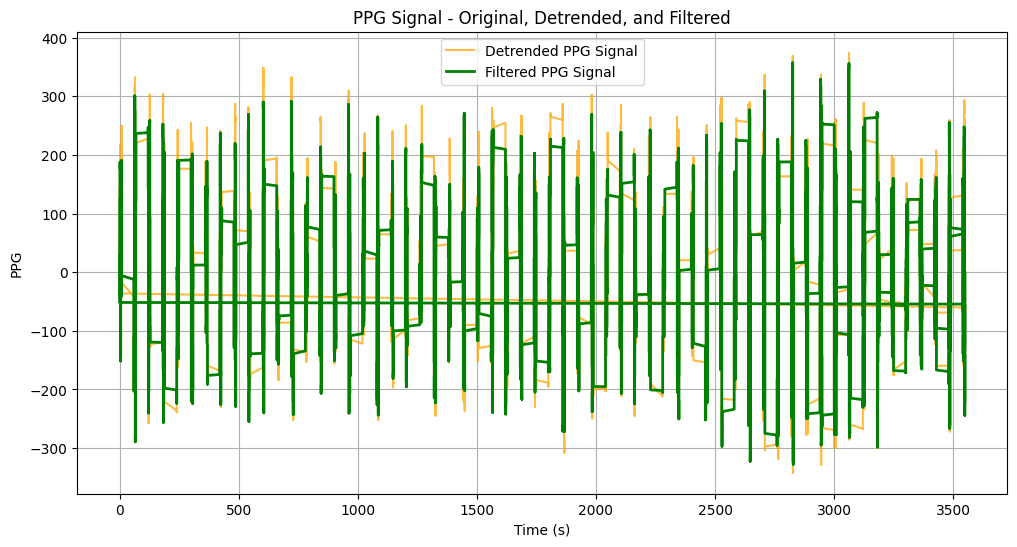

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/main/s10_run_ppg(Sheet1).csv'
df = pd.read_csv(url)

# Rename columns if necessary
df.columns = ['time', 'pleth_1']

# Convert time to a numeric value (in seconds)
df['time_numeric'] = pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.minute * 60 + pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.second
df = df.dropna(subset=['time_numeric'])  # Drop rows where time conversion failed

# Extract time and PPG signal
time = df['time_numeric']
ppg_signal = df['pleth_1']

# 1. High-pass filter to remove baseline drift
def butter_highpass(cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=2):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# High-pass filter parameters
cutoff_frequency = 0.5  # Cutoff frequency in Hz to remove low-frequency baseline drift
sampling_rate = 500  # Sampling rate in Hz

# Apply high-pass filter
detrended_signal = highpass_filter(ppg_signal, cutoff_frequency, sampling_rate)

# 2. Apply a bandpass filter for further cleaning
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Bandpass filter parameters for PPG signal (0.5-4 Hz is a common range)
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 4.0  # Upper cutoff frequency in Hz

# Apply bandpass filter to the detrended PPG signal
filtered_signal = bandpass_filter(detrended_signal, lowcut, highcut, sampling_rate)

# Plot the original, detrended, and filtered signals
plt.figure(figsize=(12, 6))
#plt.plot(time, ppg_signal, label='Original PPG Signal', alpha=0.5)
plt.plot(time, detrended_signal, label='Detrended PPG Signal', color='orange', alpha=0.75)
plt.plot(time, filtered_signal, label='Filtered PPG Signal', color='green', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.title('PPG Signal - Original, Detrended, and Filtered')
plt.show()


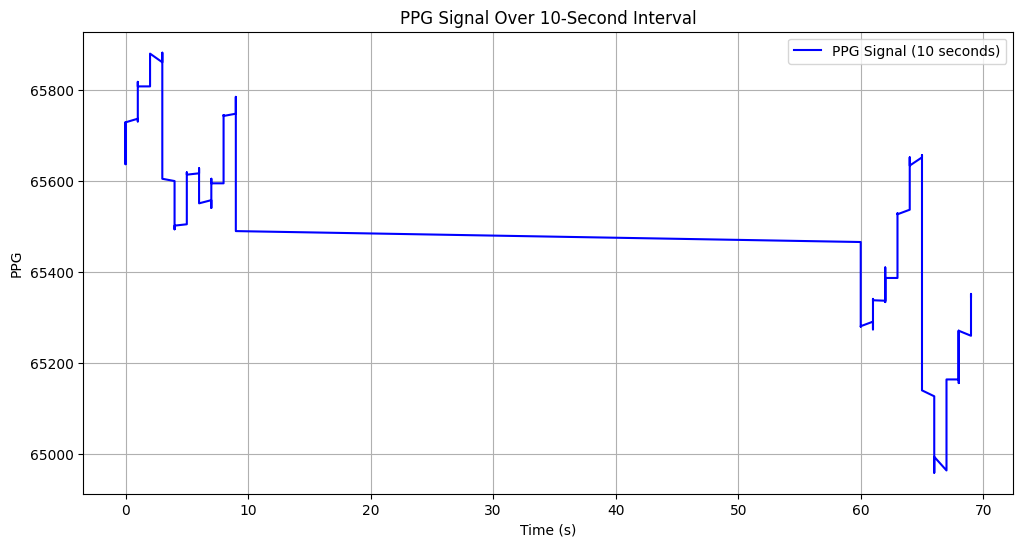

In [23]:
# Filter the data for a 10-second interval
start_time = df['time_numeric'].min()
end_time = start_time + 100  # 10 seconds interval

# Select the data within the specified time range
df_10sec = df[(df['time_numeric'] >= start_time) & (df['time_numeric'] <= end_time)]

# Extract time and PPG signal for the 10-second interval
time_10sec = df_10sec['time_numeric']
ppg_signal_10sec = df_10sec['pleth_1']

# Plot the PPG signal for the 10-second interval
plt.figure(figsize=(12, 6))
plt.plot(time_10sec, ppg_signal_10sec, color='blue', label='PPG Signal (10 seconds)')
plt.title('PPG Signal Over 10-Second Interval')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


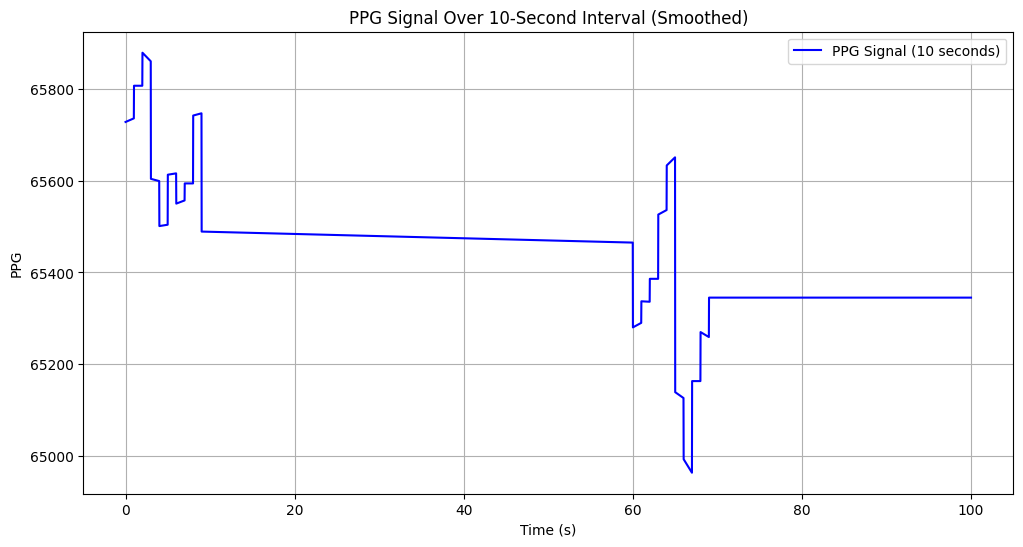

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (make sure this matches the full path to your CSV file if necessary)
df = pd.read_csv(url)

# Preprocess time column
df['time_numeric'] = pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.minute * 60 + \
                     pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.second

# Remove any rows where time conversion failed (NaN values)
df = df.dropna(subset=['time_numeric'])

# Select a 10-second interval of the PPG data for plotting
start_time = df['time_numeric'].min()
end_time = start_time + 100
df_10sec = df[(df['time_numeric'] >= start_time) & (df['time_numeric'] <= end_time)]

# Resample the data to a uniform time grid (using linear interpolation)
time_uniform = np.linspace(start_time, end_time, num=5000)  # 5000 points for smoothness
ppg_interpolated = np.interp(time_uniform, df_10sec['time_numeric'], df_10sec['pleth_1'])

# Plot the interpolated PPG signal
plt.figure(figsize=(12, 6))
plt.plot(time_uniform, ppg_interpolated, color='blue', label='PPG Signal (10 seconds)')
plt.title('PPG Signal Over 10-Second Interval (Smoothed)')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()
